# Designing the Nonlinearities to Preserve the Spectrum of the Data Covariance Matrix

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import math
pi = np.pi

In [111]:
def relu(x):
  return np.maximum(x, 0)

In [112]:
def activation_define(alpha):
  return lambda x: (relu(x) + alpha*relu(-x) - (1+alpha)/np.sqrt(2*pi))/np.sqrt(0.5*(1+alpha**2) - 1/(2*pi)*(1+alpha)**2)
   

In [113]:
alpha_1 = -1
alpha_2 = 0
alpha_3 = 1
activation_1 = activation_define(alpha_1)
activation_2 = activation_define(alpha_2)
activation_3 = activation_define(alpha_3)

plot activations

In [39]:
activation_1(np.array(3))

3.6335216887089503

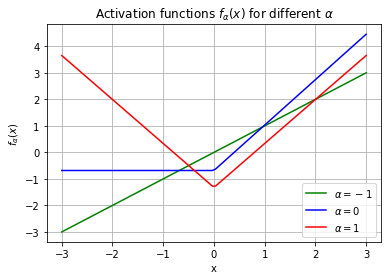

In [42]:
x = np.linspace(-3, 3, 100)

plt.plot(x,activation_1(x),'g',label=r'$\alpha=-1$')
plt.plot(x,activation_2(x),'b',label=r'$\alpha=0$')
plt.plot(x,activation_3(x),'r',label=r'$\alpha=1$')
plt.xlabel(r'x')
plt.ylabel(r'$f_{\alpha}(x)$')
plt.title(r'Activation functions $f_{\alpha}(x)$ for different $\alpha$')
plt.grid()
plt.legend()

# neural network

## 1层网络

In [107]:
n0 = 1000
m = 1000
n1 = 1000

X = np.random.randn(n0, m)
SCM_X = 1/m * (X @ X.T)

$\alpha=-1$

In [44]:
Y = X
for i in range(1):
  W = np.random.randn(n1, n0)/np.sqrt(n0)
  Y = activation_1(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


In [45]:
edges_X

array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
        0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
        0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
        0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
        1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
        1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
        2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
        2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
        2.78826423,  2.86047084,  2.93267744,  3.00488405,  3.07709065,
        3.14929726,  3.22150386,  3.29371046,  3.36591707,  3.43812367,
        3.51033028,  3.58253688,  3.65474349,  3.72695009,  3.7991567 ,
        3.8713633 ,  3.94356991,  4.01577651,  4.08798311,  4.16018972])

In [46]:
edges_Y

array([-0.1       ,  0.01551923,  0.13103845,  0.24655768,  0.36207691,
        0.47759614,  0.59311536,  0.70863459,  0.82415382,  0.93967305,
        1.05519227,  1.1707115 ,  1.28623073,  1.40174996,  1.51726918,
        1.63278841,  1.74830764,  1.86382686,  1.97934609,  2.09486532,
        2.21038455,  2.32590377,  2.441423  ,  2.55694223,  2.67246146,
        2.78798068,  2.90349991,  3.01901914,  3.13453837,  3.25005759,
        3.36557682,  3.48109605,  3.59661528,  3.7121345 ,  3.82765373,
        3.94317296,  4.05869218,  4.17421141,  4.28973064,  4.40524987,
        4.52076909,  4.63628832,  4.75180755,  4.86732678,  4.982846  ,
        5.09836523,  5.21388446,  5.32940369,  5.44492291,  5.56044214,
        5.67596137,  5.79148059,  5.90699982,  6.02251905,  6.13803828,
        6.2535575 ,  6.36907673,  6.48459596,  6.60011519,  6.71563441])

(array([  0., 134.,  84.,  57.,  49.,  39.,  36.,  34.,  29.,  29.,  25.,
         24.,  23.,  22.,  21.,  19.,  20.,  16.,  18.,  17.,  15.,  14.,
         14.,  16.,  13.,  15.,  12.,  12.,  12.,  10.,  11.,  12.,   8.,
         12.,   8.,   9.,   9.,   8.,   7.,   8.,   8.,   7.,   6.,   6.,
          7.,   6.,   6.,   5.,   4.,   4.,   5.,   3.,   4.,   2.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
         0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
         0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
         0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
         1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
         1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
         2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
         2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
         2.7

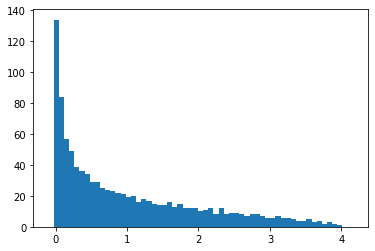

In [47]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

(array([199., 186.,  81.,  54.,  42.,  36.,  30.,  27.,  21.,  21.,  18.,
         19.,  16.,  15.,  12.,  13.,  12.,  12.,   9.,  10.,  10.,  10.,
          8.,   8.,   6.,   9.,   7.,   6.,   6.,   7.,   5.,   6.,   5.,
          5.,   5.,   5.,   4.,   5.,   3.,   4.,   5.,   2.,   4.,   4.,
          3.,   3.,   2.,   3.,   1.,   3.,   3.,   2.,   1.,   2.,   2.,
          0.,   2.,   1.,   0.]),
 array([-0.1       ,  0.01551923,  0.13103845,  0.24655768,  0.36207691,
         0.47759614,  0.59311536,  0.70863459,  0.82415382,  0.93967305,
         1.05519227,  1.1707115 ,  1.28623073,  1.40174996,  1.51726918,
         1.63278841,  1.74830764,  1.86382686,  1.97934609,  2.09486532,
         2.21038455,  2.32590377,  2.441423  ,  2.55694223,  2.67246146,
         2.78798068,  2.90349991,  3.01901914,  3.13453837,  3.25005759,
         3.36557682,  3.48109605,  3.59661528,  3.7121345 ,  3.82765373,
         3.94317296,  4.05869218,  4.17421141,  4.28973064,  4.40524987,
         4.5

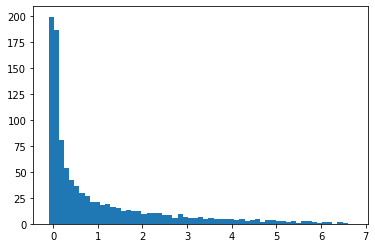

In [48]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

$\alpha=0$

In [49]:
Y = X
for i in range(1):
  W = np.random.randn(n1, n0)/np.sqrt(n0)
  Y = activation_2(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


In [50]:
edges_X

array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
        0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
        0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
        0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
        1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
        1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
        2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
        2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
        2.78826423,  2.86047084,  2.93267744,  3.00488405,  3.07709065,
        3.14929726,  3.22150386,  3.29371046,  3.36591707,  3.43812367,
        3.51033028,  3.58253688,  3.65474349,  3.72695009,  3.7991567 ,
        3.8713633 ,  3.94356991,  4.01577651,  4.08798311,  4.16018972])

In [51]:
edges_Y

array([-9.99998344e-02, -6.85846245e-05,  9.98626652e-02,  1.99793915e-01,
        2.99725165e-01,  3.99656415e-01,  4.99587664e-01,  5.99518914e-01,
        6.99450164e-01,  7.99381414e-01,  8.99312664e-01,  9.99243913e-01,
        1.09917516e+00,  1.19910641e+00,  1.29903766e+00,  1.39896891e+00,
        1.49890016e+00,  1.59883141e+00,  1.69876266e+00,  1.79869391e+00,
        1.89862516e+00,  1.99855641e+00,  2.09848766e+00,  2.19841891e+00,
        2.29835016e+00,  2.39828141e+00,  2.49821266e+00,  2.59814391e+00,
        2.69807516e+00,  2.79800641e+00,  2.89793766e+00,  2.99786891e+00,
        3.09780016e+00,  3.19773141e+00,  3.29766266e+00,  3.39759391e+00,
        3.49752516e+00,  3.59745641e+00,  3.69738766e+00,  3.79731891e+00,
        3.89725016e+00,  3.99718141e+00,  4.09711266e+00,  4.19704391e+00,
        4.29697516e+00,  4.39690641e+00,  4.49683766e+00,  4.59676891e+00,
        4.69670016e+00,  4.79663141e+00,  4.89656266e+00,  4.99649391e+00,
        5.09642516e+00,  

(array([  0., 134.,  84.,  57.,  49.,  39.,  36.,  34.,  29.,  29.,  25.,
         24.,  23.,  22.,  21.,  19.,  20.,  16.,  18.,  17.,  15.,  14.,
         14.,  16.,  13.,  15.,  12.,  12.,  12.,  10.,  11.,  12.,   8.,
         12.,   8.,   9.,   9.,   8.,   7.,   8.,   8.,   7.,   6.,   6.,
          7.,   6.,   6.,   5.,   4.,   4.,   5.,   3.,   4.,   2.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
         0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
         0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
         0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
         1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
         1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
         2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
         2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
         2.7

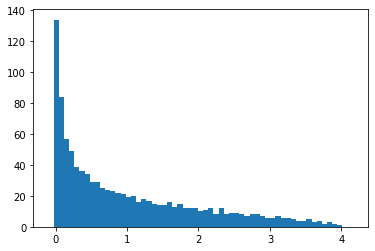

In [52]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

(array([  0., 253.,  98.,  69.,  54.,  44.,  37.,  32.,  29.,  27.,  22.,
         22.,  19.,  17.,  17.,  15.,  14.,  14.,  12.,  12.,  13.,   9.,
         10.,  10.,   9.,  10.,   8.,   7.,   8.,   6.,   7.,   7.,   6.,
          6.,   6.,   5.,   5.,   6.,   4.,   5.,   3.,   4.,   4.,   5.,
          2.,   3.,   4.,   2.,   3.,   2.,   3.,   2.,   2.,   2.,   2.,
          0.,   3.,   0.,   0.]),
 array([-9.99998344e-02, -6.85846245e-05,  9.98626652e-02,  1.99793915e-01,
         2.99725165e-01,  3.99656415e-01,  4.99587664e-01,  5.99518914e-01,
         6.99450164e-01,  7.99381414e-01,  8.99312664e-01,  9.99243913e-01,
         1.09917516e+00,  1.19910641e+00,  1.29903766e+00,  1.39896891e+00,
         1.49890016e+00,  1.59883141e+00,  1.69876266e+00,  1.79869391e+00,
         1.89862516e+00,  1.99855641e+00,  2.09848766e+00,  2.19841891e+00,
         2.29835016e+00,  2.39828141e+00,  2.49821266e+00,  2.59814391e+00,
         2.69807516e+00,  2.79800641e+00,  2.89793766e+00,  2.99

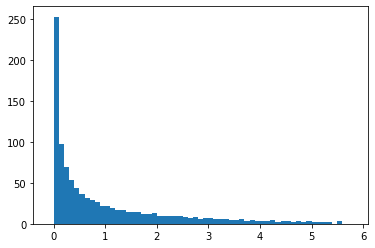

In [53]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

$\alpha=1$

In [54]:
Y = X
for i in range(1):
  W = np.random.randn(n1, n0)/np.sqrt(n0)
  Y = activation_3(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


In [55]:
edges_X

array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
        0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
        0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
        0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
        1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
        1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
        2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
        2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
        2.78826423,  2.86047084,  2.93267744,  3.00488405,  3.07709065,
        3.14929726,  3.22150386,  3.29371046,  3.36591707,  3.43812367,
        3.51033028,  3.58253688,  3.65474349,  3.72695009,  3.7991567 ,
        3.8713633 ,  3.94356991,  4.01577651,  4.08798311,  4.16018972])

In [56]:
edges_Y 

array([-0.09999961, -0.02655786,  0.04688389,  0.12032564,  0.1937674 ,
        0.26720915,  0.3406509 ,  0.41409266,  0.48753441,  0.56097616,
        0.63441791,  0.70785967,  0.78130142,  0.85474317,  0.92818492,
        1.00162668,  1.07506843,  1.14851018,  1.22195193,  1.29539369,
        1.36883544,  1.44227719,  1.51571894,  1.5891607 ,  1.66260245,
        1.7360442 ,  1.80948595,  1.88292771,  1.95636946,  2.02981121,
        2.10325296,  2.17669472,  2.25013647,  2.32357822,  2.39701997,
        2.47046173,  2.54390348,  2.61734523,  2.69078698,  2.76422874,
        2.83767049,  2.91111224,  2.984554  ,  3.05799575,  3.1314375 ,
        3.20487925,  3.27832101,  3.35176276,  3.42520451,  3.49864626,
        3.57208802,  3.64552977,  3.71897152,  3.79241327,  3.86585503,
        3.93929678,  4.01273853,  4.08618028,  4.15962204,  4.23306379])

(array([  0., 134.,  84.,  57.,  49.,  39.,  36.,  34.,  29.,  29.,  25.,
         24.,  23.,  22.,  21.,  19.,  20.,  16.,  18.,  17.,  15.,  14.,
         14.,  16.,  13.,  15.,  12.,  12.,  12.,  10.,  11.,  12.,   8.,
         12.,   8.,   9.,   9.,   8.,   7.,   8.,   8.,   7.,   6.,   6.,
          7.,   6.,   6.,   5.,   4.,   4.,   5.,   3.,   4.,   2.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.09999995, -0.02779334,  0.04441326,  0.11661987,  0.18882647,
         0.26103308,  0.33323968,  0.40544628,  0.47765289,  0.54985949,
         0.6220661 ,  0.6942727 ,  0.76647931,  0.83868591,  0.91089252,
         0.98309912,  1.05530573,  1.12751233,  1.19971893,  1.27192554,
         1.34413214,  1.41633875,  1.48854535,  1.56075196,  1.63295856,
         1.70516517,  1.77737177,  1.84957837,  1.92178498,  1.99399158,
         2.06619819,  2.13840479,  2.2106114 ,  2.282818  ,  2.35502461,
         2.42723121,  2.49943782,  2.57164442,  2.64385102,  2.71605763,
         2.7

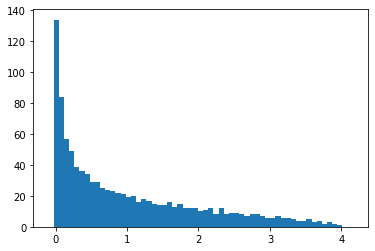

In [57]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

(array([  0., 139.,  84.,  55.,  48.,  42.,  36.,  33.,  29.,  28.,  26.,
         25.,  23.,  22.,  22.,  19.,  17.,  19.,  18.,  15.,  17.,  15.,
         16.,  14.,  12.,  12.,  12.,  13.,  12.,  11.,  11.,   9.,  11.,
         10.,   9.,   9.,   9.,   7.,   8.,   9.,   8.,   6.,   6.,   8.,
          4.,   7.,   4.,   5.,   4.,   5.,   4.,   3.,   3.,   3.,   1.,
          2.,   1.,   0.,   0.]),
 array([-0.09999961, -0.02655786,  0.04688389,  0.12032564,  0.1937674 ,
         0.26720915,  0.3406509 ,  0.41409266,  0.48753441,  0.56097616,
         0.63441791,  0.70785967,  0.78130142,  0.85474317,  0.92818492,
         1.00162668,  1.07506843,  1.14851018,  1.22195193,  1.29539369,
         1.36883544,  1.44227719,  1.51571894,  1.5891607 ,  1.66260245,
         1.7360442 ,  1.80948595,  1.88292771,  1.95636946,  2.02981121,
         2.10325296,  2.17669472,  2.25013647,  2.32357822,  2.39701997,
         2.47046173,  2.54390348,  2.61734523,  2.69078698,  2.76422874,
         2.8

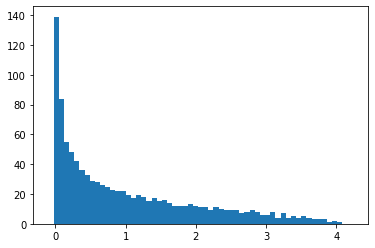

In [58]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

# 10层网络

In [135]:
n = [1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000] # greater n gets greater results
m = 1000

X = np.random.randn(n[0], m)
SCM_X = 1/m * (X @ X.T)

$\alpha=-1$

In [136]:
Y = X
for i in range(10):
  print(i)
  W = np.random.randn(n[i+1], n[i])/np.sqrt(n[i])
  Y = activation_1(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


0
1
2
3
4
5
6
7
8
9


In [137]:
edges_X

array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
        0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
        0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
        0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
        1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
        1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
        2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
        2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
        2.77344292,  2.84527899,  2.91711505,  2.98895111,  3.06078718,
        3.13262324,  3.2044593 ,  3.27629537,  3.34813143,  3.41996749,
        3.49180356,  3.56363962,  3.63547568,  3.70731174,  3.77914781,
        3.85098387,  3.92281993,  3.994656  ,  4.06649206,  4.13832812])

In [138]:
edges_Y

array([-0.1       +0.j,  0.39936461+0.j,  0.89872922+0.j,  1.39809384+0.j,
        1.89745845+0.j,  2.39682306+0.j,  2.89618767+0.j,  3.39555228+0.j,
        3.89491689+0.j,  4.39428151+0.j,  4.89364612+0.j,  5.39301073+0.j,
        5.89237534+0.j,  6.39173995+0.j,  6.89110456+0.j,  7.39046918+0.j,
        7.88983379+0.j,  8.3891984 +0.j,  8.88856301+0.j,  9.38792762+0.j,
        9.88729223+0.j, 10.38665685+0.j, 10.88602146+0.j, 11.38538607+0.j,
       11.88475068+0.j, 12.38411529+0.j, 12.8834799 +0.j, 13.38284452+0.j,
       13.88220913+0.j, 14.38157374+0.j, 14.88093835+0.j, 15.38030296+0.j,
       15.87966757+0.j, 16.37903219+0.j, 16.8783968 +0.j, 17.37776141+0.j,
       17.87712602+0.j, 18.37649063+0.j, 18.87585524+0.j, 19.37521986+0.j,
       19.87458447+0.j, 20.37394908+0.j, 20.87331369+0.j, 21.3726783 +0.j,
       21.87204291+0.j, 22.37140753+0.j, 22.87077214+0.j, 23.37013675+0.j,
       23.86950136+0.j, 24.36886597+0.j, 24.86823059+0.j, 25.3675952 +0.j,
       25.86695981+0.j, 2

(array([  0., 132.,  84.,  58.,  46.,  40.,  38.,  30.,  31.,  28.,  26.,
         25.,  22.,  23.,  19.,  21.,  19.,  17.,  17.,  17.,  16.,  15.,
         16.,  13.,  14.,  14.,  11.,  13.,  12.,  11.,  11.,  10.,  11.,
          9.,   9.,   9.,  11.,   7.,   7.,   8.,   7.,   7.,   9.,   6.,
          6.,   5.,   5.,   7.,   3.,   5.,   3.,   4.,   4.,   3.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
         0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
         0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
         0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
         1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
         1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
         2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
         2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
         2.7

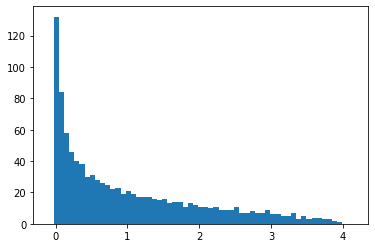

In [139]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([808.,  43.,  25.,  15.,  12.,  10.,   8.,   6.,   6.,   4.,   5.,
          4.,   3.,   4.,   3.,   3.,   3.,   1.,   2.,   3.,   2.,   2.,
          2.,   1.,   1.,   2.,   1.,   1.,   2.,   0.,   2.,   1.,   1.,
          1.,   1.,   1.,   1.,   0.,   1.,   0.,   1.,   1.,   1.,   0.,
          0.,   0.,   1.,   0.,   0.,   1.,   0.,   1.,   1.,   0.,   0.,
          1.,   0.,   0.,   1.]),
 array([-0.1       +0.j,  0.39936461+0.j,  0.89872922+0.j,  1.39809384+0.j,
         1.89745845+0.j,  2.39682306+0.j,  2.89618767+0.j,  3.39555228+0.j,
         3.89491689+0.j,  4.39428151+0.j,  4.89364612+0.j,  5.39301073+0.j,
         5.89237534+0.j,  6.39173995+0.j,  6.89110456+0.j,  7.39046918+0.j,
         7.88983379+0.j,  8.3891984 +0.j,  8.88856301+0.j,  9.38792762+0.j,
         9.88729223+0.j, 10.38665685+0.j, 10.88602146+0.j, 11.38538607+0.j,
        11.88475068+0.j, 12.38411529+0.j, 12.8834799 +0.j, 13.38284452+0.j,
        13.88220913+0.j, 14.38157374+0.j, 14.88093835+0.j, 15.38

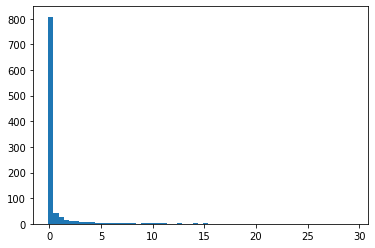

In [140]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

$\alpha=0$

In [141]:
Y = X
for i in range(10):
  W = np.random.randn(n[i+1], n[i])/np.sqrt(n[i])
  Y = activation_2(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


In [142]:
edges_X

array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
        0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
        0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
        0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
        1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
        1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
        2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
        2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
        2.77344292,  2.84527899,  2.91711505,  2.98895111,  3.06078718,
        3.13262324,  3.2044593 ,  3.27629537,  3.34813143,  3.41996749,
        3.49180356,  3.56363962,  3.63547568,  3.70731174,  3.77914781,
        3.85098387,  3.92281993,  3.994656  ,  4.06649206,  4.13832812])

In [143]:
edges_Y

array([-0.09999996,  0.20683731,  0.51367457,  0.82051183,  1.12734909,
        1.43418636,  1.74102362,  2.04786088,  2.35469815,  2.66153541,
        2.96837267,  3.27520993,  3.5820472 ,  3.88888446,  4.19572172,
        4.50255899,  4.80939625,  5.11623351,  5.42307077,  5.72990804,
        6.0367453 ,  6.34358256,  6.65041983,  6.95725709,  7.26409435,
        7.57093161,  7.87776888,  8.18460614,  8.4914434 ,  8.79828067,
        9.10511793,  9.41195519,  9.71879245, 10.02562972, 10.33246698,
       10.63930424, 10.94614151, 11.25297877, 11.55981603, 11.86665329,
       12.17349056, 12.48032782, 12.78716508, 13.09400235, 13.40083961,
       13.70767687, 14.01451413, 14.3213514 , 14.62818866, 14.93502592,
       15.24186319, 15.54870045, 15.85553771, 16.16237497, 16.46921224,
       16.7760495 , 17.08288676, 17.38972403, 17.69656129, 18.00339855])

(array([  0., 132.,  84.,  58.,  46.,  40.,  38.,  30.,  31.,  28.,  26.,
         25.,  22.,  23.,  19.,  21.,  19.,  17.,  17.,  17.,  16.,  15.,
         16.,  13.,  14.,  14.,  11.,  13.,  12.,  11.,  11.,  10.,  11.,
          9.,   9.,   9.,  11.,   7.,   7.,   8.,   7.,   7.,   9.,   6.,
          6.,   5.,   5.,   7.,   3.,   5.,   3.,   4.,   4.,   3.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
         0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
         0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
         0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
         1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
         1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
         2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
         2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
         2.7

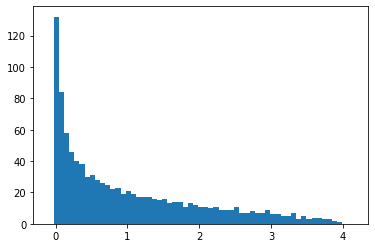

In [144]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

(array([132.,  84.,  58.,  46.,  40.,  38.,  30.,  31.,  28.,  26.,  25.,
         22.,  23.,  19.,  21.,  19.,  17.,  17.,  17.,  16.,  15.,  16.,
         13.,  14.,  14.,  11.,  13.,  12.,  11.,  11.,  10.,  11.,   9.,
          9.,   9.,  11.,   7.,   7.,   8.,   7.,   7.,   9.,   6.,   6.,
          5.,   5.,   7.,   3.,   5.,   3.,   4.,   4.,   3.,   3.,   2.,
          0.,   0.,   0.]),
 array([-0.02816353,  0.04367253,  0.11550859,  0.18734466,  0.25918072,
         0.33101678,  0.40285284,  0.47468891,  0.54652497,  0.61836103,
         0.6901971 ,  0.76203316,  0.83386922,  0.90570529,  0.97754135,
         1.04937741,  1.12121348,  1.19304954,  1.2648856 ,  1.33672166,
         1.40855773,  1.48039379,  1.55222985,  1.62406592,  1.69590198,
         1.76773804,  1.83957411,  1.91141017,  1.98324623,  2.05508229,
         2.12691836,  2.19875442,  2.27059048,  2.34242655,  2.41426261,
         2.48609867,  2.55793474,  2.6297708 ,  2.70160686,  2.77344292,
         2.8452789

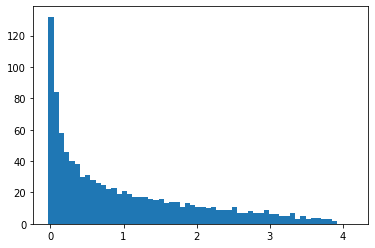

In [145]:
plt.hist(eigs_X[1:],bins=edges_X[1:],label='Empirical eigenvalues of $1/mXX^T$')

(array([388., 178.,  98.,  66.,  48.,  35.,  29.,  22.,  19.,  17.,  12.,
         13.,  10.,   7.,   9.,   7.,   5.,   5.,   6.,   4.,   3.,   4.,
          3.,   3.,   2.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([-0.09999996,  0.20683731,  0.51367457,  0.82051183,  1.12734909,
         1.43418636,  1.74102362,  2.04786088,  2.35469815,  2.66153541,
         2.96837267,  3.27520993,  3.5820472 ,  3.88888446,  4.19572172,
         4.50255899,  4.80939625,  5.11623351,  5.42307077,  5.72990804,
         6.0367453 ,  6.34358256,  6.65041983,  6.95725709,  7.26409435,
         7.57093161,  7.87776888,  8.18460614,  8.4914434 ,  8.79828067,
         9.10511793,  9.41195519,  9.71879245, 10.02562972, 10.33246698,
        10.63930424, 10.94614151, 11.25297877, 11.55981603, 11.86665329,
        12.1

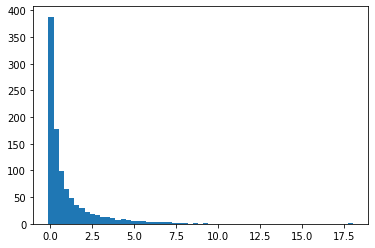

In [146]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

(array([178.,  98.,  66.,  48.,  35.,  29.,  22.,  19.,  17.,  12.,  13.,
         10.,   7.,   9.,   7.,   5.,   5.,   6.,   4.,   3.,   4.,   3.,
          3.,   2.,   2.,   1.,   0.,   2.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.]),
 array([ 0.20683731,  0.51367457,  0.82051183,  1.12734909,  1.43418636,
         1.74102362,  2.04786088,  2.35469815,  2.66153541,  2.96837267,
         3.27520993,  3.5820472 ,  3.88888446,  4.19572172,  4.50255899,
         4.80939625,  5.11623351,  5.42307077,  5.72990804,  6.0367453 ,
         6.34358256,  6.65041983,  6.95725709,  7.26409435,  7.57093161,
         7.87776888,  8.18460614,  8.4914434 ,  8.79828067,  9.10511793,
         9.41195519,  9.71879245, 10.02562972, 10.33246698, 10.63930424,
        10.94614151, 11.25297877, 11.55981603, 11.86665329, 12.17349056,
        12.4803278

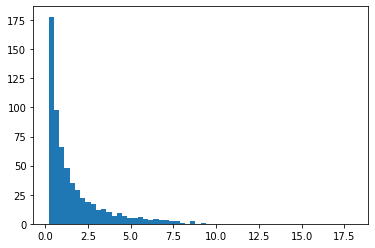

In [147]:
plt.hist(eigs_Y[1:],bins=edges_Y[1:],label='Empirical eigenvalues of $1/mYY^T$')

$\alpha=1$

In [153]:
Y = X
for i in range(10):
  W = np.random.randn(n[i+1], n[i])/np.sqrt(n[i])
  Y = activation_3(W @ Y)
SCM_Y = 1/m * (Y @ Y.T)  

eigs_X = np.linalg.eig(SCM_X)[0]
eigs_Y = np.linalg.eig(SCM_Y)[0]

edges_X = np.linspace(np.min(eigs_X)-.1,np.max(eigs_X)+.2,60)
edges_Y = np.linspace(np.min(eigs_Y)-.1,np.max(eigs_Y)+.2,60)


In [154]:
edges_X

array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
        0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
        0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
        0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
        1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
        1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
        2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
        2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
        2.77344292,  2.84527899,  2.91711505,  2.98895111,  3.06078718,
        3.13262324,  3.2044593 ,  3.27629537,  3.34813143,  3.41996749,
        3.49180356,  3.56363962,  3.63547568,  3.70731174,  3.77914781,
        3.85098387,  3.92281993,  3.994656  ,  4.06649206,  4.13832812])

In [155]:
edges_Y 

array([-0.09999952,  0.35124398,  0.80248748,  1.25373098,  1.70497448,
        2.15621798,  2.60746148,  3.05870498,  3.50994848,  3.96119199,
        4.41243549,  4.86367899,  5.31492249,  5.76616599,  6.21740949,
        6.66865299,  7.11989649,  7.57113999,  8.02238349,  8.47362699,
        8.92487049,  9.37611399,  9.82735749, 10.27860099, 10.72984449,
       11.18108799, 11.63233149, 12.08357499, 12.53481849, 12.98606199,
       13.43730549, 13.888549  , 14.3397925 , 14.791036  , 15.2422795 ,
       15.693523  , 16.1447665 , 16.59601   , 17.0472535 , 17.498497  ,
       17.9497405 , 18.400984  , 18.8522275 , 19.303471  , 19.7547145 ,
       20.205958  , 20.6572015 , 21.108445  , 21.5596885 , 22.010932  ,
       22.4621755 , 22.913419  , 23.3646625 , 23.81590601, 24.26714951,
       24.71839301, 25.16963651, 25.62088001, 26.07212351, 26.52336701])

(array([  0., 132.,  84.,  58.,  46.,  40.,  38.,  30.,  31.,  28.,  26.,
         25.,  22.,  23.,  19.,  21.,  19.,  17.,  17.,  17.,  16.,  15.,
         16.,  13.,  14.,  14.,  11.,  13.,  12.,  11.,  11.,  10.,  11.,
          9.,   9.,   9.,  11.,   7.,   7.,   8.,   7.,   7.,   9.,   6.,
          6.,   5.,   5.,   7.,   3.,   5.,   3.,   4.,   4.,   3.,   3.,
          2.,   1.,   0.,   0.]),
 array([-0.0999996 , -0.02816353,  0.04367253,  0.11550859,  0.18734466,
         0.25918072,  0.33101678,  0.40285284,  0.47468891,  0.54652497,
         0.61836103,  0.6901971 ,  0.76203316,  0.83386922,  0.90570529,
         0.97754135,  1.04937741,  1.12121348,  1.19304954,  1.2648856 ,
         1.33672166,  1.40855773,  1.48039379,  1.55222985,  1.62406592,
         1.69590198,  1.76773804,  1.83957411,  1.91141017,  1.98324623,
         2.05508229,  2.12691836,  2.19875442,  2.27059048,  2.34242655,
         2.41426261,  2.48609867,  2.55793474,  2.6297708 ,  2.70160686,
         2.7

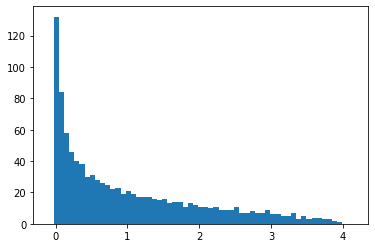

In [151]:
plt.hist(eigs_X,bins=edges_X,label='Empirical eigenvalues of $1/mXX^T$')

(array([132.,  84.,  58.,  46.,  40.,  38.,  30.,  31.,  28.,  26.,  25.,
         22.,  23.,  19.,  21.,  19.,  17.,  17.,  17.,  16.,  15.,  16.,
         13.,  14.,  14.,  11.,  13.,  12.,  11.,  11.,  10.,  11.,   9.,
          9.,   9.,  11.,   7.,   7.,   8.,   7.,   7.,   9.,   6.,   6.,
          5.,   5.,   7.,   3.,   5.,   3.,   4.,   4.,   3.,   3.,   2.,
          0.,   0.,   0.]),
 array([-0.02816353,  0.04367253,  0.11550859,  0.18734466,  0.25918072,
         0.33101678,  0.40285284,  0.47468891,  0.54652497,  0.61836103,
         0.6901971 ,  0.76203316,  0.83386922,  0.90570529,  0.97754135,
         1.04937741,  1.12121348,  1.19304954,  1.2648856 ,  1.33672166,
         1.40855773,  1.48039379,  1.55222985,  1.62406592,  1.69590198,
         1.76773804,  1.83957411,  1.91141017,  1.98324623,  2.05508229,
         2.12691836,  2.19875442,  2.27059048,  2.34242655,  2.41426261,
         2.48609867,  2.55793474,  2.6297708 ,  2.70160686,  2.77344292,
         2.8452789

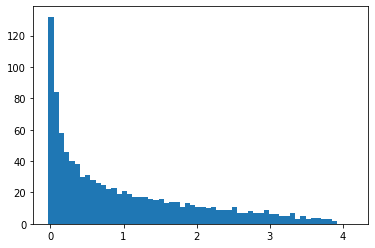

In [156]:
plt.hist(eigs_X[1:],bins=edges_X[1:],label='Empirical eigenvalues of $1/mXX^T$')

(array([366., 176., 119.,  91.,  73.,  55.,  44.,  34.,  23.,  14.,   3.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.]),
 array([-0.09999952,  0.35124398,  0.80248748,  1.25373098,  1.70497448,
         2.15621798,  2.60746148,  3.05870498,  3.50994848,  3.96119199,
         4.41243549,  4.86367899,  5.31492249,  5.76616599,  6.21740949,
         6.66865299,  7.11989649,  7.57113999,  8.02238349,  8.47362699,
         8.92487049,  9.37611399,  9.82735749, 10.27860099, 10.72984449,
        11.18108799, 11.63233149, 12.08357499, 12.53481849, 12.98606199,
        13.43730549, 13.888549  , 14.3397925 , 14.791036  , 15.2422795 ,
        15.693523  , 16.1447665 , 16.59601   , 17.0472535 , 17.498497  ,
        17.9

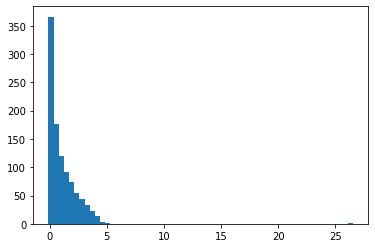

In [158]:
plt.hist(eigs_Y,bins=edges_Y,label='Empirical eigenvalues of $1/mYY^T$')

/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:1969: ComplexWarning: Casting complex values to real discards the imaginary part
  x, y = float(x), float(y)


(array([ 0.,  0.,  0., 18., 55., 63., 64., 64., 61., 60., 57., 54., 51.,
        49., 46., 42., 41., 37., 37., 31., 30., 28., 26., 22., 19., 17.,
        14.,  9.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.]),
 array([ 0.26730129+0.j,  0.63460258+0.j,  1.00190386+0.j,  1.36920515+0.j,
         1.73650644+0.j,  2.10380773+0.j,  2.47110901+0.j,  2.8384103 +0.j,
         3.20571159+0.j,  3.57301288+0.j,  3.94031416+0.j,  4.30761545+0.j,
         4.67491674+0.j,  5.04221803+0.j,  5.40951932+0.j,  5.7768206 +0.j,
         6.14412189+0.j,  6.51142318+0.j,  6.87872447+0.j,  7.24602575+0.j,
         7.61332704+0.j,  7.98062833+0.j,  8.34792962+0.j,  8.71523091+0.j,
         9.08253219+0.j,  9.44983348+0.j,  9.81713477+0.j, 10.18443606+0.j,
        10.55173734+0.j, 10.91903863+0.j, 11.28633992+0.j, 11.65364121+0.j,
        12.02094249+0.j, 12.38824378+0.j, 12.75554507+0.j, 1

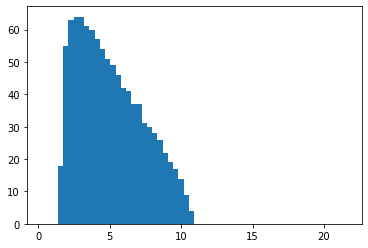

In [127]:
plt.hist(eigs_Y[1:],bins=edges_Y[1:],label='Empirical eigenvalues of $1/mYY^T$')